## Importing Libraries
In this section I will be installing all the libraries necessary to scrape websites of data and make graphs out of that data

In [46]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

# Pulling data
In this section I decided that I will be scraping data from the uks top best selling singles nalyze the top 50 best selling singles. In regards to the assignment, my data points will be the 50 best selling uk singles.The four attributes that I chose were the titles of the artists, the sales, and the release date of each single.


In [47]:
# Read webpage and parse it with beautiful soup
opened_webpage = requests.get("https://www.officialcharts.com/chart-news/the-best-selling-singles-of-all-time-on-the-official-uk-chart__21298/")
print ("Webpage opened successfully...")

bs = BeautifulSoup(opened_webpage.content, 'html.parser')

print ("Webpage loaded and parsed successfully...")

# Make lists in correspondence with the four chosen attributes
titles = []
artists = []
sales = []
release_dates = []


Webpage opened successfully...
Webpage loaded and parsed successfully...


## Identifying/Extracting Data
In this section I will be using beautifulsoup functions to identify and extract all of the usefull data that I will be needing to make a usefull graph. The way this works is that beautifulsoup is used to find the data inside a table and it then extracts the information needed and appends it into the corresponding list.

In [48]:
# Find the table containing the top 50 singles
table = bs.find('table')

# Extract the data from the table
rows = table.select('tr')[1:]
for row in rows:
    cells = row.select('td')
    title = cells[0].text.strip()
    artist = cells[1].text.strip()
    sale = cells[2].text.strip()
    release_date = cells[3].text.strip()
    titles.append(title)
    artists.append(artist)
    sales.append(sale)
    release_dates.append(release_date)


## Cleaning up the data
In this section we wil take the raw data that we gathered from beautifulsoup and clean it up so that it can be used in a bar graph.

In [49]:
# Create a dataframe with the extracted data
df = pd.DataFrame({'title': titles, 'artist': artists, 'sales': sales, 'release_date': release_dates})

# Define a function to clean up the data
def clean_data(df):
    # Convert the sales column to numeric
    df['sales'] = df['sales'].astype(str).str.replace(',', '')
    try:
        df['sales'] = df['sales'].astype(float)
    except ValueError:
        print(df.loc[df['sales'].apply(lambda x: not x.isnumeric())])
    return df

## Creating the Graph
In this section we will be using the cleaned data to create a bar graph and a scatter plot using the data from the pandas dataframe.

    title                                             artist  \
0       1  SOMETHING ABOUT THE WAY YOU LOOK TONIGHT/CANDL...   
1       2                       DO THEY KNOW IT'S CHRISTMAS?   
2       3                                  BOHEMIAN RHAPSODY   
3       4                      MULL OF KINTYRE/GIRLS' SCHOOL   
4       5                         YOU'RE THE ONE THAT I WANT   
..    ...                                                ...   
174   175                                         FORGET YOU   
175   176                                          EYE LEVEL   
176   177                                 SEXY AND I KNOW IT   
177   178                   LONG HAIRED LOVER FROM LIVERPOOL   
178   179                                       SHAKE IT OFF   

                                  sales release_date  
0                            ELTON JOHN         1997  
1                              BAND AID         1984  
2                                 QUEEN         1975  
3          

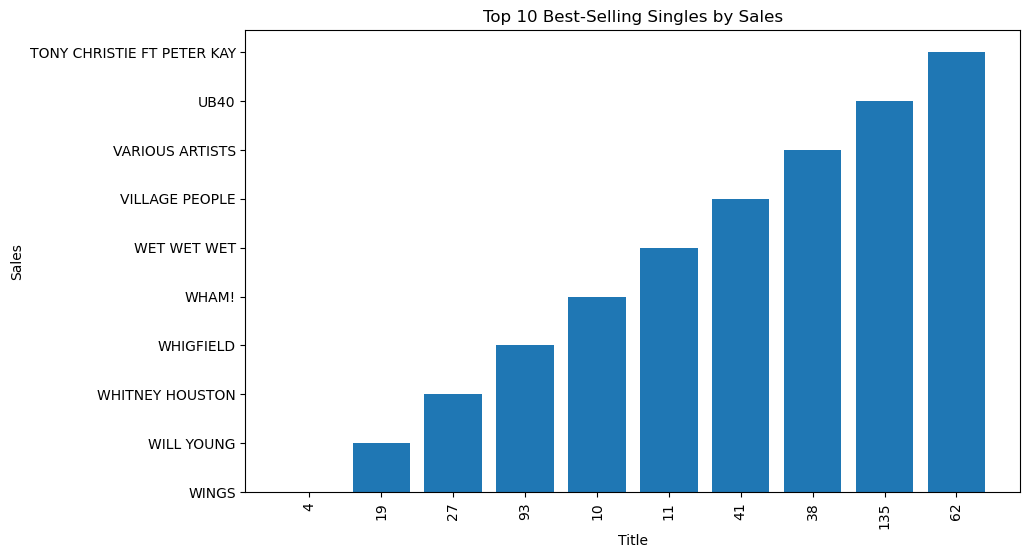

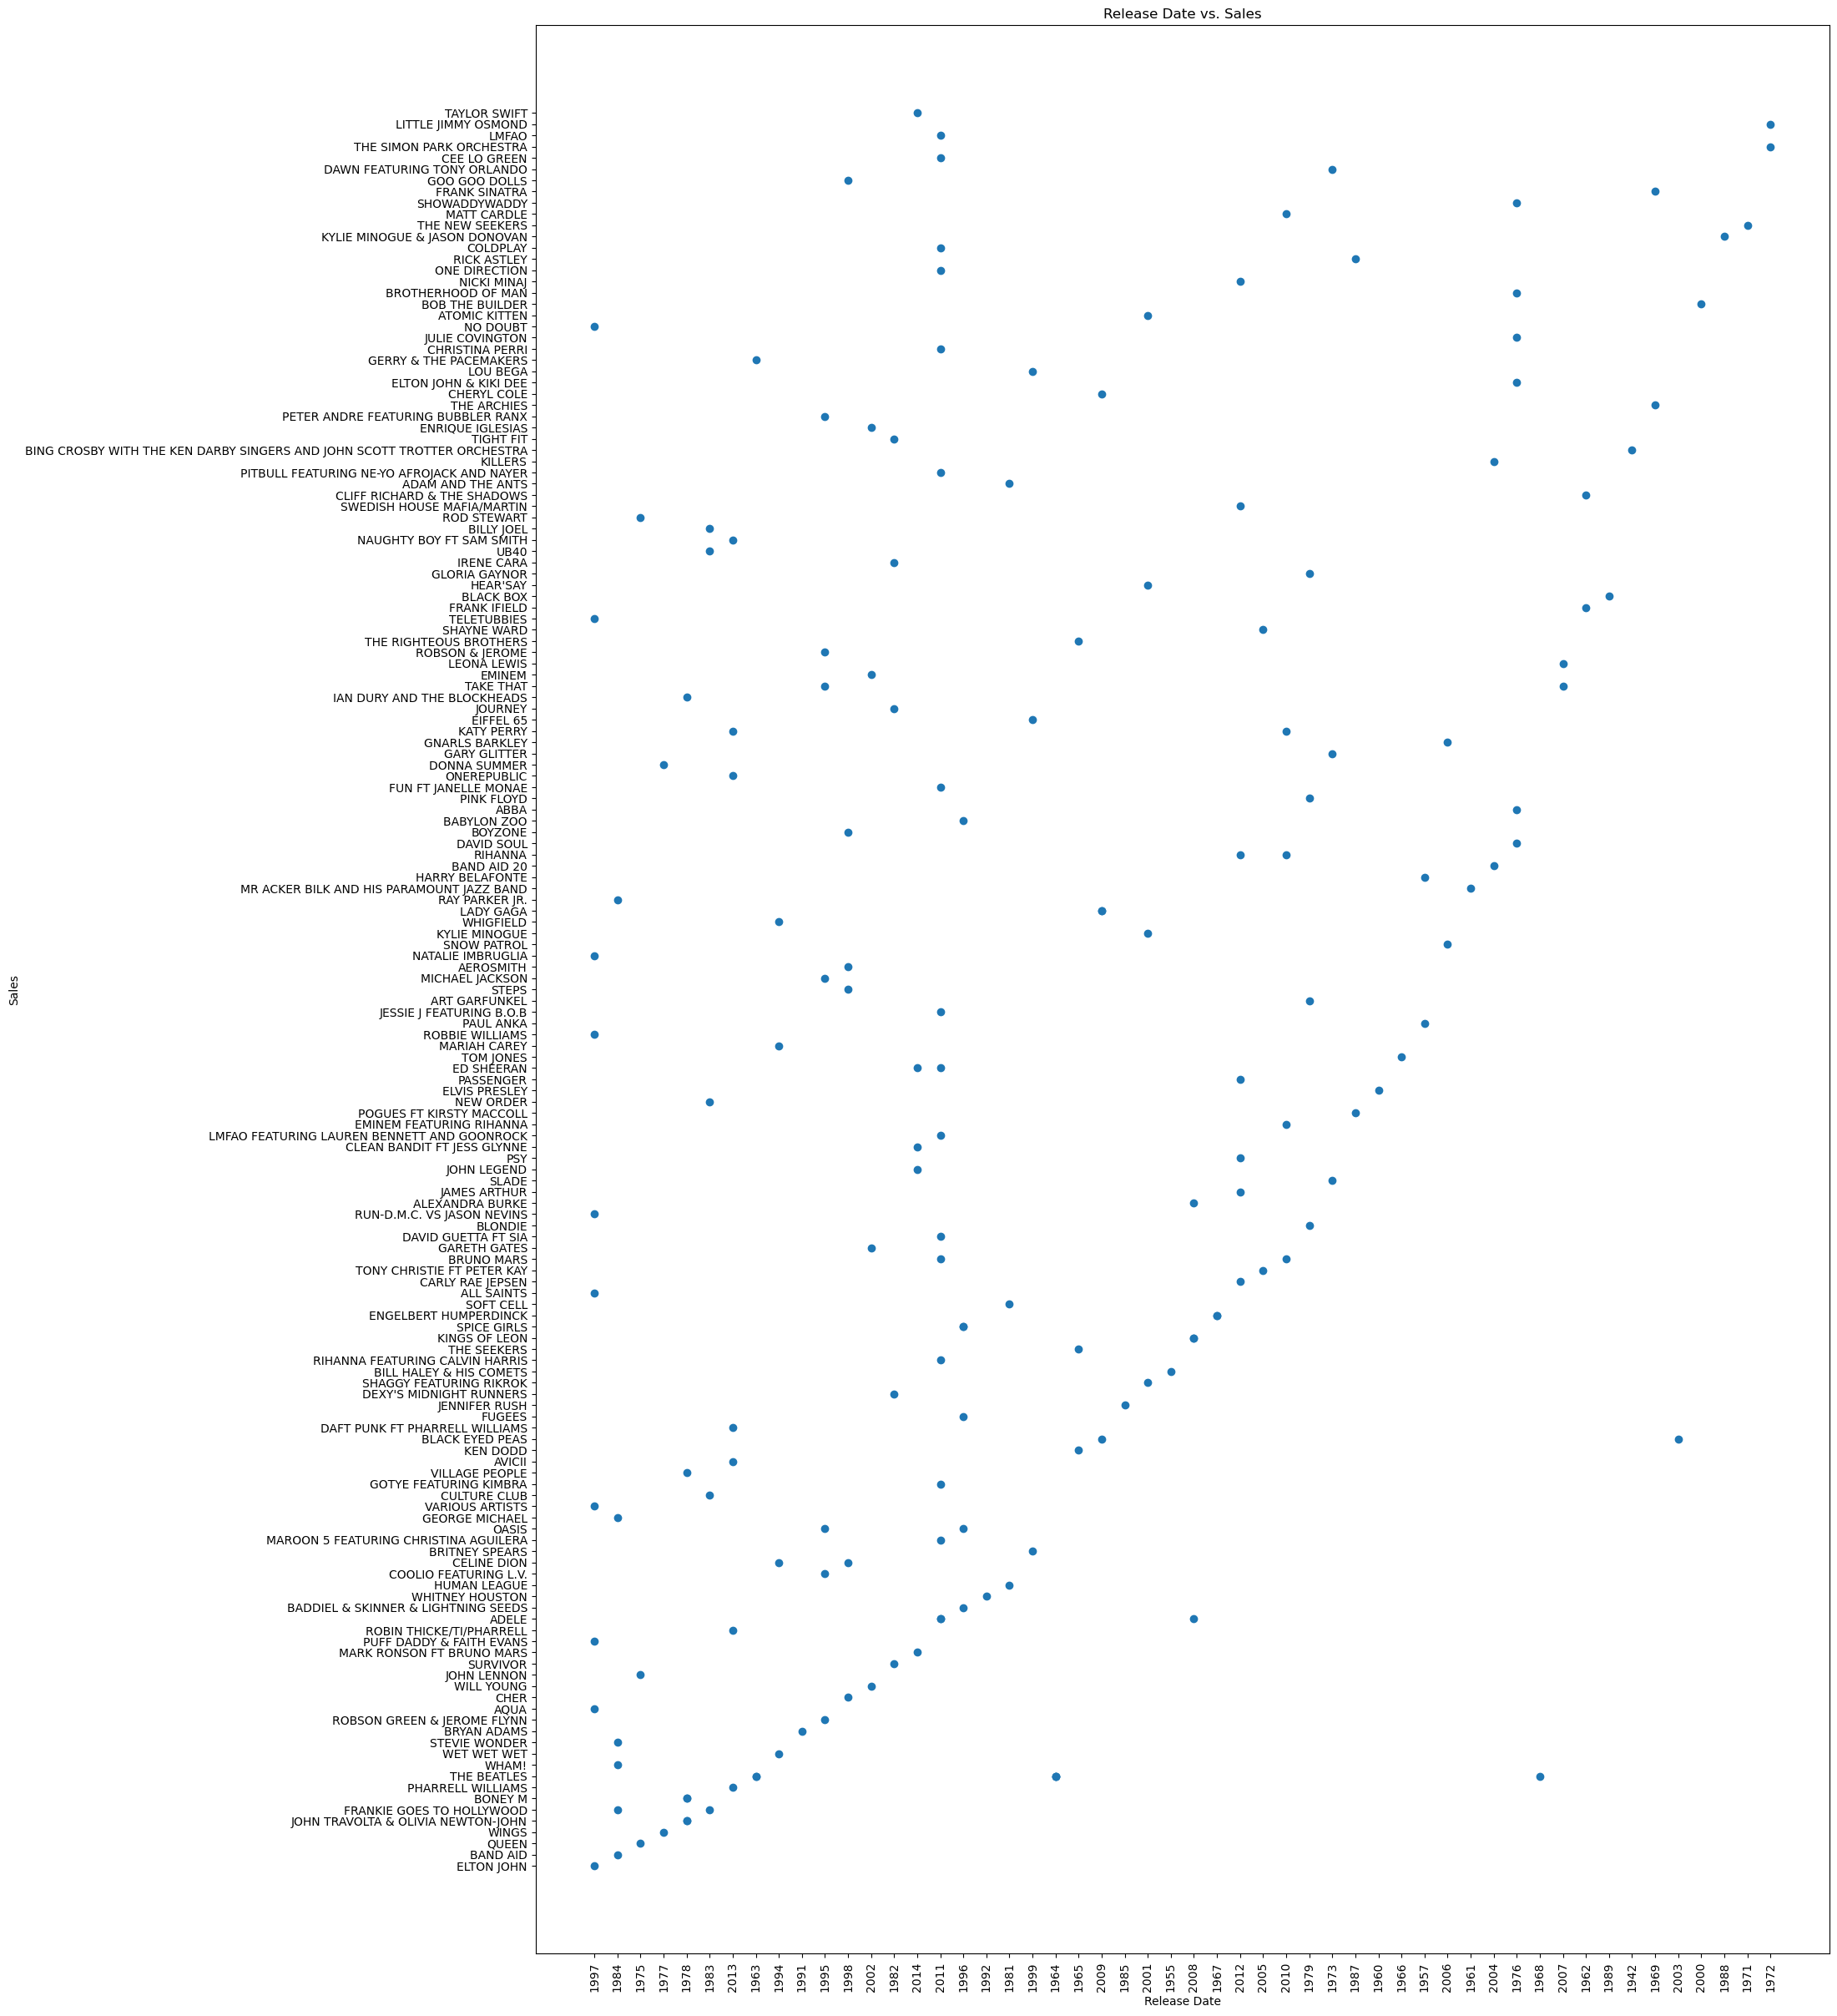

In [50]:
# Call the clean_data function to clean up the data
df_cleaned = clean_data(df)

# Save the processed data to a CSV file
df_cleaned.to_csv('processed_data.csv', index=False)

# Sort the DataFrame by sales and get the top 10 rows
top_10 = df.sort_values('sales', ascending=False).head(10)

# Create a bar graph of the top 10 singles
plt.figure(figsize=(10, 6))
plt.bar(top_10['title'], top_10['sales'])
plt.xticks(rotation=90, fontsize=10)
plt.xlabel('Title')
plt.ylabel('Sales')
plt.title('Top 10 Best-Selling Singles by Sales')
plt.show()

# Create a scatter plot of release date and sales
plt.figure(figsize=(20, 30))
plt.scatter(df['release_date'], df['sales'])
plt.xticks(rotation=90, fontsize=10)
plt.xlabel('Release Date')
plt.ylabel('Sales')
plt.title('Release Date vs. Sales')
plt.show()


## Description
The bar chart shows a quick visual comparison of the sales of the top 10 singles
The second graph is a scatter plot that shows the relationship between the release date and sales of the best-selling singles in the UK.
